<a href="https://colab.research.google.com/github/Mahi200728/DataScience-A2/blob/main/Javi_MahiU7proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 7 Project: Polynomials, Splines, and GPs, Oh my!

**Task**:

Two parts:

1. Propose a data set that's compatible with pymc and/or bambi. I must approve your submission before you move on to part 2.

2. Create, analyze, and present any guassian process or approximate GP, degenerate or otherwise (this means glms and b splines are allowed), using pymc within the colab environment, on a data set of your choice, with the following conditions:
  - your final model must have more than 2 predictors. The intercept term doesn't count as a predictor here (even though technically it is), or if must be an actual GP
  - You must document and explain your model selection method. This means you must argue that your model choice (glm, b spline, GP) is better than at least one other choice. You may use either a theoretical or numerical argument.



Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a model or likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Choose a data set with lots of columns, and lots of potential interactions between variables. It'll be more fun, and will make model/variable selection more relevant.

- This is not a competition to come up with the fanciest model structure. Find a data set that interests you, and apply the simplest model that captures the patterns in the data.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- I actually encourge you to use b splines; they work quite well, and trying to determine the location of the knots requires careful thought about the context of the data.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


# Description

I decided to do PCOS Diagnosis and its correlation to things like age, bmi, menstrual irregularity, testosterone level, and antral follicle count. This is a huge topic for me considering it is something that affects the people close to me. Essential biological breakdown of PCOS and what each varible means and its relationship with PCOS diagnosis are: PCOS stands for Polycystic Ovary Syndrome and it is a hormonal disorder that affects patients by causing irrgularity in their menstural cycle, excess androgens, cysts, and insulin resistance. Beyond that it affects things like fertility and it is also is hugely ignored by the medical industry with doctors just passing it off as the person being unhealthy. Getting a diagnosis is basically a huge feat but if we can figure out the factors that lead to it and things that can identify it we can start to diagnos more and more patients and give them the help they need.

So the variables we are going to look at are age, BMI, menstrual irregularity, testosterone level, and antral follicle count. Age and BMI are self explanitory but most often people who are young dont get diagnosed (until it actually manifests into a fertility issue) and along those same lines people with high BMIs are typically not diagnosed as the doctor brushes it off as the patient just being unhealthy. Going off what I stated above Menstrual Irregularity is a huge issue and the main symptom of PCOS but it is also just brushed off as being caused by external factors like age (young) or eating/exersize habits. Testosterone levels is another one that is affected by PCOS as patients who have PCOS overproduce some hormones (like testostrone) and underproduce others. And finally antral follicle count is essential a test that measures the antral follicles present in the patient (obvi), and antral follicle are essentially a sack in the ovary that contains the immature egg before it is relased. Patients who have PCOS typically have a higher number of antral follicles (people with pcos have avg of 20 or more while normal patients have 10-15) which can cause high levels of infertility.

# Code

In [ ]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-atyz23g9
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-atyz23g9
  Resolved https://github.com/pydata/xarray.git to commit 282235f4f3e3432c9defaee45777ecef256d8684
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev23+g282235f4-py3-none-any.whl size=1262810 sha256=08d0e39f72df621fa90d7aeb9e1455cec2f5c8516744ee156d34a0d86538c27f
  Stored in directory: /tmp/pip-ephem-wheel-cache-31qoo4ue/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.5 MB/s eta 0:00:00
   ━

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
import pymc as pm
import seaborn as sns

In [ ]:
pcos = pd.read_csv('https://raw.githubusercontent.com/Mahi200728/DataScience-A2/refs/heads/main/pcos_dataset.csv')

In [ ]:
pcos

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0
...,...,...,...,...,...,...
995,34,18.4,1,95.7,23,0
996,45,28.9,1,28.5,7,0
997,37,28.3,0,32.4,28,0
998,41,27.3,0,95.6,9,0


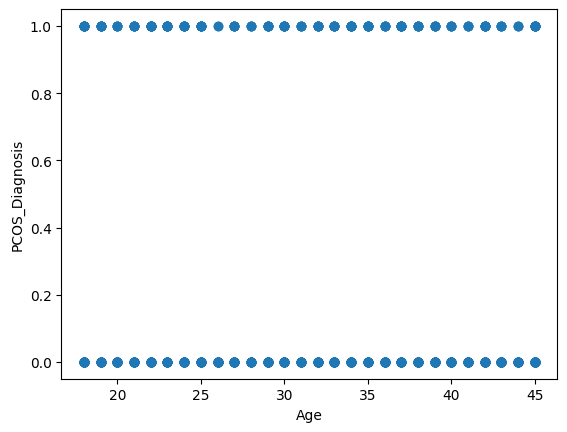

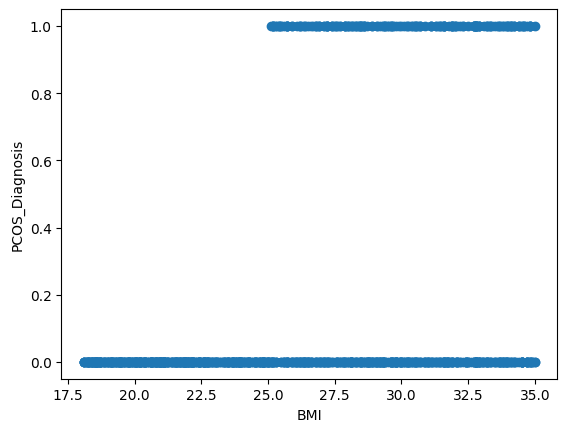

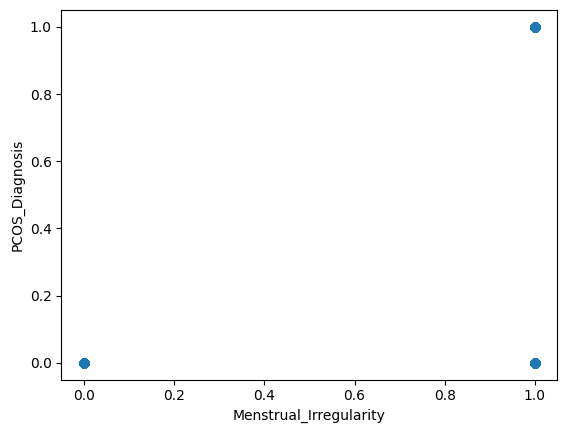

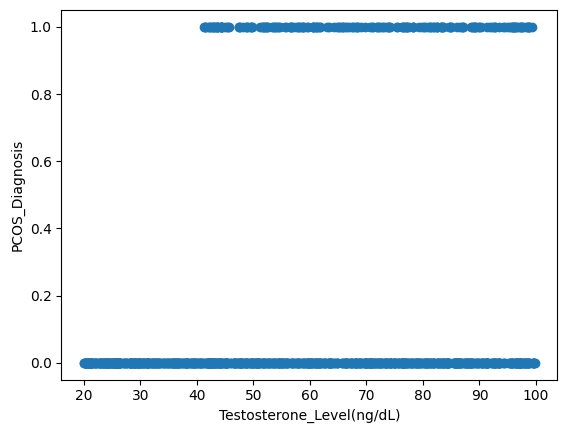

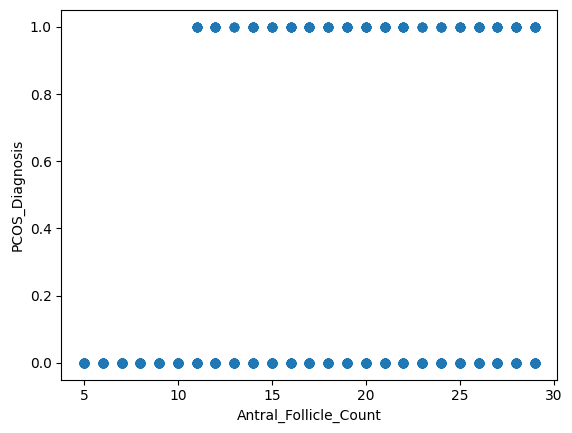

In [ ]:
x = ["Age", "BMI", "Menstrual_Irregularity", "Testosterone_Level(ng/dL)", "Antral_Follicle_Count"]
y = "PCOS_Diagnosis"
for a in x:
  plt.scatter(pcos[a], pcos[y])
  plt.xlabel(a)
  plt.ylabel(y)
  plt.show()

After graphing all the variables in relation to pcos diagnosis I realized that since pcos diagnosis is a binary variable it just created some lines so i decided to do logistical regressions from unit 5.

In [ ]:
pc_diag = pcos['PCOS_Diagnosis']
age = pcos['Age']
bmi = pcos['BMI']
mi = pcos['Menstrual_Irregularity']
tl = pcos['Testosterone_Level(ng/dL)']
af = pcos['Antral_Follicle_Count']

In [ ]:
with pm.Model() as model_pc:
    # Priors
    α = pm.Normal("α", mu=0, sigma=10)
    β_age = pm.Normal("β_age", mu=0, sigma=10)
    β_bmi = pm.Normal("β_bmi", mu=0, sigma=10)
    β_mi = pm.Normal("β_mi", mu=0, sigma=10)
    β_tl = pm.Normal("β_tl", mu=0, sigma=10)
    β_af = pm.Normal("β_af", mu=0, sigma=10)

    # Linear part of the model, incorporating predictors
    μ = α + β_age * age.values + β_bmi * bmi.values + β_mi * mi.values + β_tl * tl.values + β_af * af.values

    # The linear part, mu, is transformed via a sigmoid curve
    θ = pm.Deterministic("θ", pm.math.sigmoid(μ))
    bd = pm.Deterministic("bd", -α / β)
    bd_age = pm.Deterministic("bd_age", -α / β_age)
    bd_bmi = pm.Deterministic("bd_bmi", -α / β_bmi)
    bd_mi = pm.Deterministic("bd_mi", -α / β_mi)
    bd_tl = pm.Deterministic("bd_tl", -α / β_tl)
    bd_af = pm.Deterministic("bd_af", -α / β_af)

    # Likelihood
    # Using pc_diag.values (PCOS_Diagnosis) as observed data
    y = pm.Bernoulli("y", p=θ, observed=pc_diag.values)

    idata_pc = pm.sample()

Output()

0 divergences!!!!

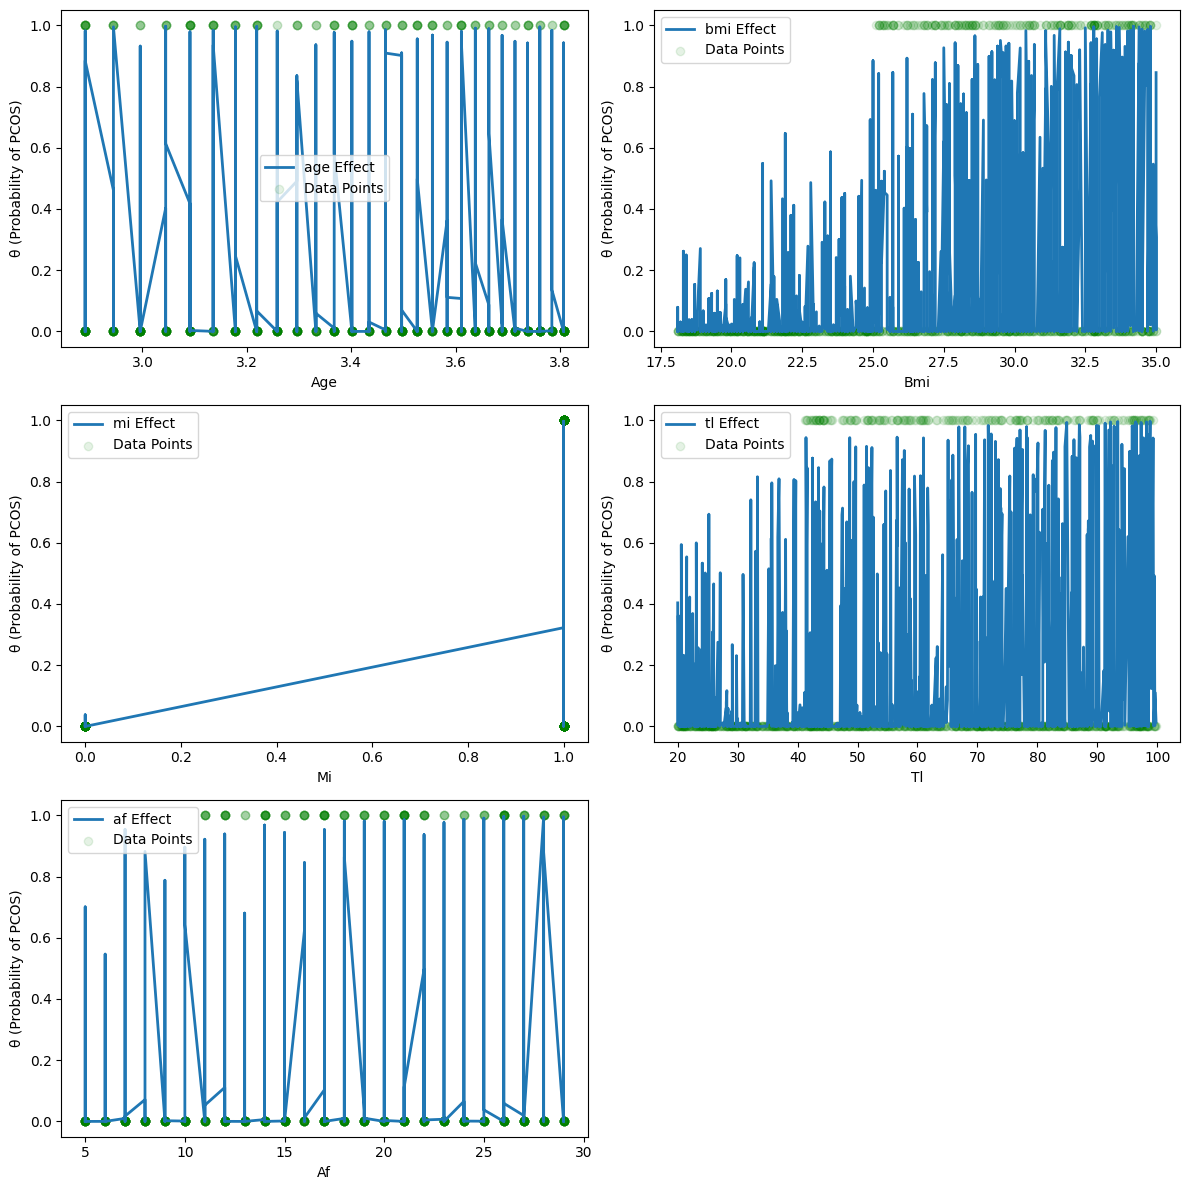

In [ ]:
# Extract posterior samples
posterior = idata_pc.posterior

# Variables to plot
variables = ["age", "bmi", "mi", "tl", "af"]
column_names = ["Age", "BMI", "Menstrual_Irregularity", "Testosterone_Level(ng/dL)", "Antral_Follicle_Count"]
beta_vars = ["β_age", "β_bmi", "β_mi", "β_tl", "β_af"]

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
ax = ax.flatten()

# Plot each variable
for i, var in enumerate(variables):
    if var == "age":
        var_data = np.log(age)
        var_label = "log_age"  # Update label for x-axis
    else:
        var_data = pcos[column_names[i]]
        var_label = var

    idx = np.argsort(var_data)
    var_sorted = var_data.values[idx]
    theta_sorted = posterior["θ"].mean(dim=("chain", "draw")).values[idx]

    # Plot sigmoid curve
    ax[i].plot(var_sorted, theta_sorted, color="C0", lw=2, label=f"{var} Effect")
    #bd_hdi = az.hdi(posterior["bd"])
    #ax.fill_betweenx([0, 1], bd_hdi["bd"][0], bd_hdi["bd"][1], color="C2", alpha=0.6, lw=0)


    # Scatter raw data with adjusted alpha
    ax[i].scatter(var_data, pc_diag, alpha=0.1, c="green", label="Data Points")


    ax[i].set_xlabel(var.capitalize())
    ax[i].set_ylabel("θ (Probability of PCOS)")
    ax[i].legend()

# Remove empty subplot if odd number of variables
fig.delaxes(ax[-1])

plt.tight_layout()
plt.show()

Disclamir: i made it work with hdi but then I editted one thing and it all went kaboom and so hdi doesn't work anymore but I still am going to include what I can in the analysis because I think it is important and I can fix the HDI later.

### Age
For the Age graph there was a small increase and a wide HDI coverage in probability of PCOS as people grew older but it was decently weak. This means that as people grow older the probability of getting diagnosed with PCOS increases which inturn confirms what I stated way at the beginning, where most aren't diagnosed till it affects fertility. Though there are some issues with this the main ones being that i used a log function for age (it was breaking without it) which may have affected the linerization of probability inturn skewing the graphs. Overall while there is a slight correlation it definetly isn't the best graph to predict this by.

### BMI
The BMI graph is super steep and linear with a narrow HDI which means that there is most likely a strong positive correlation between BMI and diagnosis of PCOS. This makes sense because one of the side affects of PCOS is irradict weight gain as the bodies hormones are way off. This did go against my theory above where I said most times patients get brushed off as just being overweight, rather based on the data it seems like most providers take intense weight gain as a sign that they might have PCOS.

### Menstrual Irregularity
This graph was super weird and had a sharp increase but it makes sense cause in most if not all cases the main symptom/side affect of PCOS is irregular periods. Beyond that this data set was also binary like PCOS Diagnosis so it makes sense that there isn't much data to go off. But based on what we do have we can tell there is a large correlation between menstrual irregularity and diagonsis.

### Testosterone Level
This graph does have a slight increase but it isn't very apparent in the graph given. But I think that has more to do with the way in which the grpah was set up than anything else. Since most females already have testosterone there is already a baseline of that hormone, what we want is the difference between a healthy person and a person with pcos, but because the graph is so zoomed out we really cant tell. But based on what we can see there is a clear positive relationship. This makes sense as PCOS is inherently a hormonal issue and one of the main testing ways to diagnosis PCOS is testostrone levels (along with other hormones).

### Antral Follicle Count
Finally the Antral Follicle count didn't really have a super clear increase (while there is a little bit) but based on what we can see there is a correlation between the count and diagnosis. This was the most surprising outcome to me because if anything is easiest to get it is the antral follicle count as it is done through an ultrasound, but the only main reasons why I think there isn't a huge correlation is because it might be hard to identify them (idk how clear the ultrasound is) or just that the data isn't as clear because this is based on human judgement while the others are based on pure numbers and machines. But the HDI was decently narrow so it seems like it is confident in the data given.

### Overall
Overall all of these factors are things that definetly affect PCOS diagnosis but there are a few issues that come to mind when thinking about these, the main ones being whether or not the women who were not diagnosed with PCOS were in the process or not. By that i mean obviously there would be a clear difference between people who were confirmed no and confirmed yes but there would be more grey area if some weren't sure. Theres also the method in which the data might have been collected (its from kaggle so who knows). There are also pure enviormental factors that might affect some of these variables and we don't know how widespread the data is (if its from one region or not) (there are just a lot of issues from the source of this data). Theres also the fact that these graphs objectvly aren't the best and if there were better ones maybe it would be helpful. And finally a lot is based on human interaction which is super biased (as mentioned in the beginning) so honestly everything could be super skewed based on bias and we would never know. Overall not the best analysis but there is a defnite correlation.